In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2

2026-01-02 21:26:44.584543: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-02 21:26:45.176253: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-02 21:26:46.737304: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [9]:
# Load the dataset
path = "../data/LSWMD.pkl"
df = pd.read_pickle(path)
print("\nDataFrame columns:", df.columns)
print("\nDataFrame shape:", df.shape)
print("\nFirst few rows:", df.head())


DataFrame columns: Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'failureType'],
      dtype='object')

DataFrame shape: (811457, 6)

First few rows:                                             waferMap  dieSize lotName  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   

   waferIndex trianTestLabel failureType  
0         1.0   [[Training]]    [[none]]  
1         2.0   [[Training]]    [[none]]  
2         3.0   [[Training]]    [[none]]  
3         4.0   [[Training]]    [[none]]  
4         5.0   [[Training]]    [[none]]  


In [10]:
# Analyze wafer map
print("\n" + "="*50)
print(" "*15 + "WAFER MAP ANALYSIS")
print("="*50)

# Check wafer map dimensions
sample_wafer = df["waferMap"].iloc[0]
print(f"Sample wafter map type: {type(sample_wafer)}")
print(f"Sample wafer map shape: {sample_wafer.shape}")
print("\nData overview:")
print(df.info())


               WAFER MAP ANALYSIS
Sample wafter map type: <class 'numpy.ndarray'>
Sample wafer map shape: (45, 48)

Data overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB
None


In [11]:
# Example data
df.iloc[95:110]

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
95,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,21.0,[[Training]],[[none]]
96,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,22.0,[[Training]],[[none]]
97,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,23.0,[[Training]],[[none]]
98,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,24.0,[[Training]],[[none]]
99,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,25.0,[[Training]],[[none]]
100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,1.0,[[Training]],[[Edge-Ring]]
101,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,2.0,[[Training]],[[none]]
102,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,3.0,[[Training]],[[none]]
103,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,4.0,[[Training]],[[none]]
104,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,5.0,[[Training]],[[none]]


The waferMap column contains arrays of each pixel on the Wafer Bin Map (WBM). Each number represents each category:
- 0: Not a wafer
- 1: Normal
- 2: Faulty

Since we only need the waferMap and its failureType, we can drop other columns. (For train-test data, we will split by ourselves.)

In [12]:
# Drop out ununsed columns
df2 = df.copy().drop(columns=['dieSize', 'lotName', 'waferIndex', 'trianTestLabel'])
df2.head()

,waferMap,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[[none]]


Data type of the column before: object
Data type after changing: category
failureType
none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
Name: count, dtype: int64


np.int64(172950)

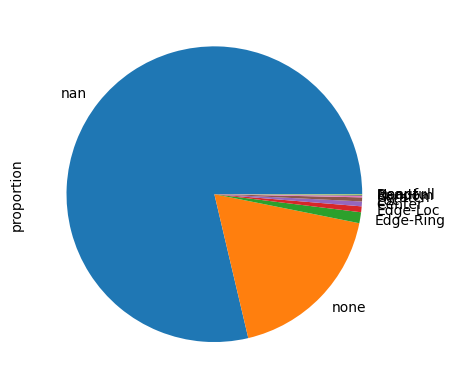

In [13]:
# Mapping the failureType into easier format and handle empty labels
df2.failureType = df2.failureType.apply(lambda x: x[0][0] if len(x) > 0 else pd.NA)

print(f"Data type of the column before: {df2.failureType.dtype}")
df2.failureType = df2.failureType.astype('category')
print(f"Data type after changing: {df2.failureType.dtype}")

print(df2.failureType.value_counts())
df2['failureType'].value_counts(dropna = False, normalize = True).plot.pie()
# df2['failureType'].value_counts().plot.bar()
df2['failureType'].value_counts().sum()

Most of the dataset has empty label, we then have only 172950 data left.

In [14]:
# Remove the unlabeled rows and map defect types into numerical value

df2 = df2.dropna(subset=['failureType'])

type_mapping = {'Center': 0, 
                'Donut': 1, 
                'Edge-Loc': 2, 
                'Edge-Ring': 3, 
                'Loc': 4, 
                'Random': 5, 
                'Scratch': 6, 
                'Near-full': 7, 
                'none': 8}
df2 = df2.replace({'failureType': type_mapping}).infer_objects(copy=False)

df2.head()


/tmp/ipykernel_3321/2056915318.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace({'failureType': type_mapping}).infer_objects(copy=False)
/tmp/ipykernel_3321/2056915318.py:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2 = df2.replace({'failureType': type_mapping}).infer_objects(copy=False)


,waferMap,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8


failureType
8    147431
3      9680
2      5189
0      4294
4      3593
6      1193
5       866
1       555
7       149
Name: count, dtype: int64


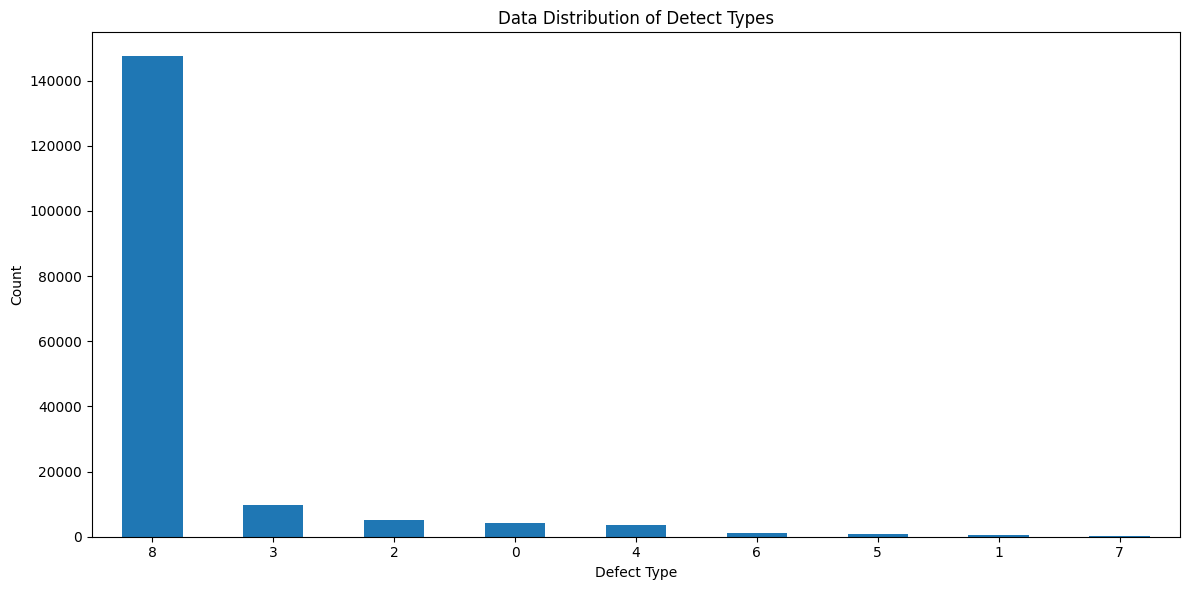

In [15]:
# Data visualization
def plot_distribution(df_, title):
    failure_counts = df_.failureType.value_counts()
    plt.figure(figsize=(12, 6))
    failure_counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel("Defect Type")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.tight_layout()

failure_counts = df2.failureType.value_counts()
print(failure_counts)
plot_distribution(df2, "Data Distribution of Detect Types")

From the dataset, there's an imbalance number of data in each categories which may result in bias or underfitting data for small sample categories.

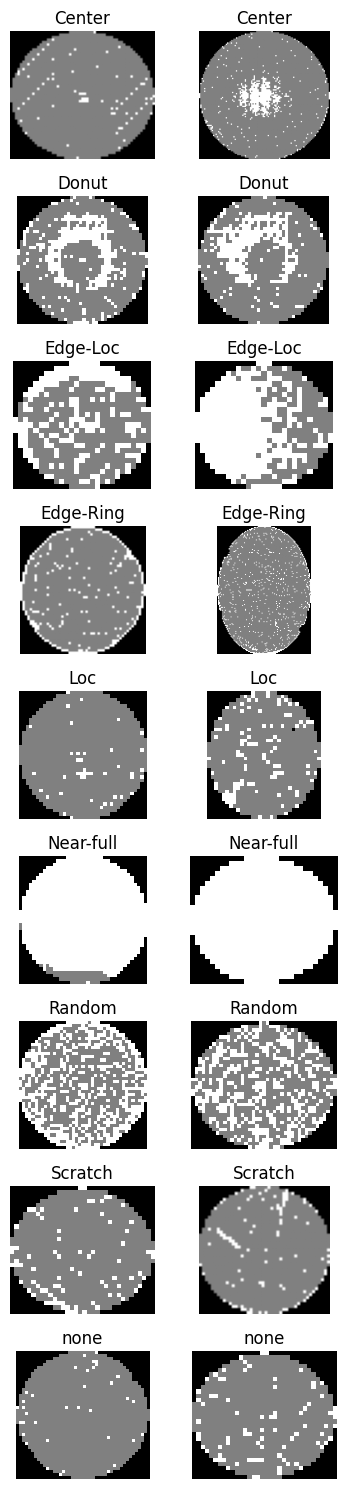

In [16]:
# Plot example of each failure types
sample_size = 2
failure_types = list(df2.failureType.cat.categories)
fig, axis = plt.subplots(len(failure_types), sample_size, figsize=(2*sample_size,15))
for i_cat in range(len(failure_types)):
    category = failure_types[i_cat]
    samples = df2.loc[df2.failureType == category].sample(sample_size)
    for i in range(len(samples)):
        sample_index = samples.index[i]
        axis[i_cat, i].imshow(samples['waferMap'][sample_index], cmap="gray")
        axis[i_cat, i].axis('off')
        category_name = [name for name, value in type_mapping.items() if value == category]
        axis[i_cat, i].set_title(category_name[0])
plt.tight_layout()

Data Augmentation is a method to oversampling the data by rotation of 90 degree, 180 degree, 270 degree, left flip and right flip of the wafer bin map. This helps increasing 5 samples more for each data sample which could assist in reducing the data bias of our dataset.

In [18]:
# Data augmentation (Oversampling)

augmented_data = []

implementing_df = df2[df2['failureType'] != 8]
for index, row in implementing_df.iterrows():
    wafer_map = row['waferMap']
    rotated_90 = np.rot90(wafer_map, 1)
    rotated_180 = np.rot90(wafer_map, 2)
    rotated_270 = np.rot90(wafer_map, 3)
    flip_vert = np.flipud(wafer_map)
    flip_hori = np.fliplr(wafer_map)

    augmented_data.append({"waferMap": rotated_90, "failureType": row['failureType']})
    augmented_data.append({"waferMap": rotated_180, "failureType": row['failureType']})
    augmented_data.append({"waferMap": rotated_270, "failureType": row['failureType']})
    augmented_data.append({"waferMap": flip_vert, "failureType": row['failureType']})
    augmented_data.append({"waferMap": flip_hori, "failureType": row['failureType']})

augmented_df = pd.DataFrame(augmented_data)
df3 = pd.concat([df2, augmented_df], ignore_index=True)
df3.failureType.value_counts()
    

failureType
8    147431
3     58080
2     31134
0     25764
4     21558
6      7158
5      5196
1      3330
7       894
Name: count, dtype: int64

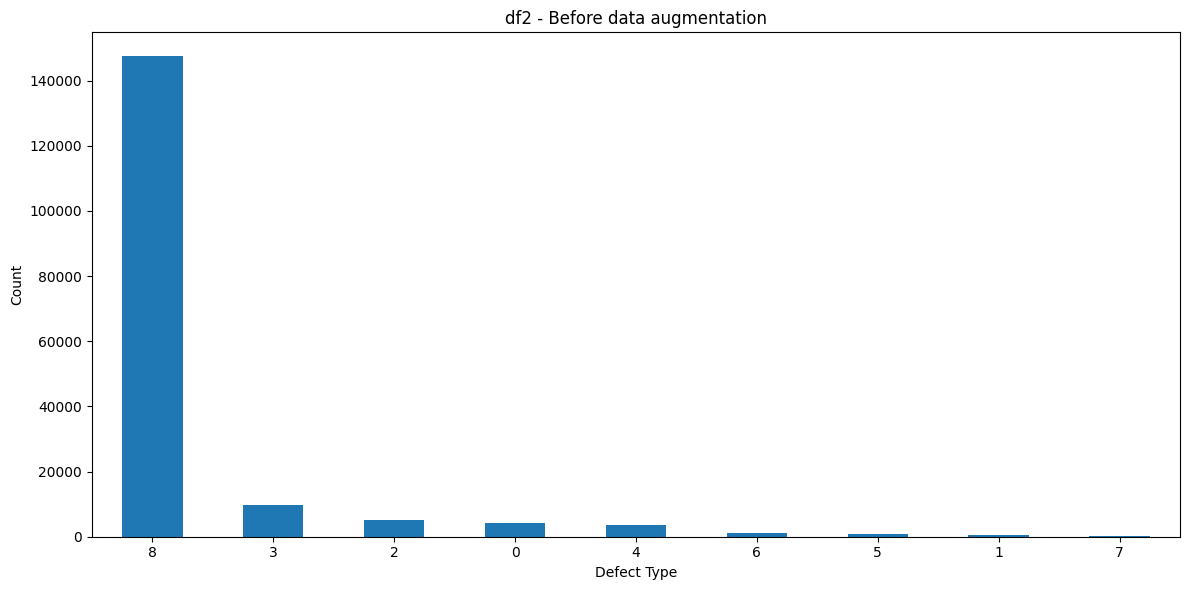

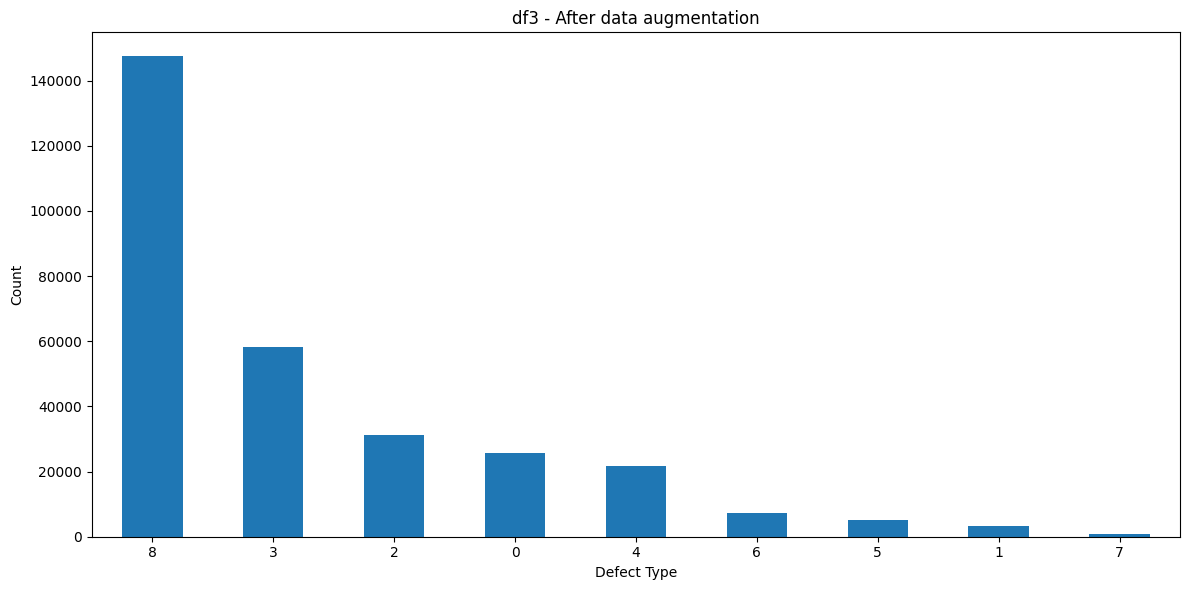

In [19]:
# Before vs After
plot_distribution(df2, "df2 - Before data augmentation")
plot_distribution(df3, "df3 - After data augmentation")

In [20]:
# Split the dataset
X = df3['waferMap'].values
y = df3['failureType'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
print("Training target statistics:", Counter(y_train))
print("Testing target statistics:", Counter(y_test))

Training target statistics: Counter({np.int64(8): 117945, np.int64(3): 46464, np.int64(2): 24907, np.int64(0): 20611, np.int64(4): 17247, np.int64(6): 5726, np.int64(5): 4157, np.int64(1): 2664, np.int64(7): 715})
Testing target statistics: Counter({np.int64(8): 29486, np.int64(3): 11616, np.int64(2): 6227, np.int64(0): 5153, np.int64(4): 4311, np.int64(6): 1432, np.int64(5): 1039, np.int64(1): 666, np.int64(7): 179})


In [21]:
# Resize training data
import cv2

def resize_images(images, size):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, size)
        resized_images.append(resized_image)
    return np.array(resized_images)

X_train_resized = resize_images(X_train, (48, 48))
X_test_resized = resize_images(X_test, (48, 48))

In [22]:
# Construct CNN architecture

num_classes = 9

model = models.Sequential([
    layers.Rescaling(1/2, input_shape=(48,48,1)), # Normalize from 0 - 2 to 0 - 1

    # First Convolutional Block
    layers.Conv2D(8, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((2,2), strides=2),

    # Second Convolutional Block
    layers.Conv2D(16, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((2,2), strides=2),

    # Third Convolutional Block
    layers.Conv2D(32, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((2,2), strides=2),

    # Fourth Convolutional Block
    layers.Conv2D(64, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),

    # Dropout layer
    layers.Dropout(0.5),

    # Fully connected layer
    layers.Flatten(),
    layers.Dense(num_classes),
    layers.Softmax()
])

# Compile the model (Adam is an optimization algorithm that performs gradient descent using adaptive learning rates for each parameter.)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Display model summary
model.summary()

/home/teetat/miniconda3/envs/wafer/lib/python3.10/site-packages/keras/src/layers/preprocessing/data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1767364078.553482    3321 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5560 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 48, 48, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │        20,745 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 9)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,609 (178.16 KB)

 Trainable params: 45,369 (177.22 KB)

 Non-trainable params: 240 (960.00 B)

In [23]:
# X_train_tf = tf.convert_to_tensor(X_train_resized, dtype=tf.float32)
# X_test_tf = tf.convert_to_tensor(X_test_resized, dtype=tf.float32)

In [24]:
# print(X_train_tf.shape, X_train_tf.dtype)
# print(y_train.shape, y_train.dtype)

# print(tf.reduce_min(X_train_tf).numpy(), tf.reduce_max(X_train_tf).numpy())

In [25]:
# Train the model
history = model.fit(
    X_train_resized, y_train,
    epochs=30,
    batch_size=128,
    validation_data=(X_test_resized, y_test),
    shuffle=True,
    verbose=1 # detailed output (0 for suppression)
)

Epoch 1/30


2026-01-02 21:28:05.542385: I external/local_xla/xla/service/service.cc:163] XLA service 0x73d810015af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-02 21:28:05.542419: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2026-01-02 21:28:05.590922: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-02 21:28:05.833507: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91701


  52/1879 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5998 - loss: 1.3499

I0000 00:00:1767364088.722746    3739 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1879/1879 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8820 - loss: 0.3540 - val_accuracy: 0.9160 - val_loss: 0.2393
Epoch 2/30
1879/1879 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9155 - loss: 0.2449 - val_accuracy: 0.9223 - val_loss: 0.2483
Epoch 3/30
1879/1879 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9253 - loss: 0.2164 - val_accuracy: 0.9182 - val_loss: 0.2424
Epoch 4/30
1879/1879 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9312 - loss: 0.1991 - val_accuracy: 0.9348 - val_loss: 0.1827
Epoch 5/30
1879/1879 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9354 - loss: 0.1874 - val_accuracy: 0.9209 - val_loss: 0.2402
Epoch 6/30
1879/1879 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9383 - loss: 0.1777 - val_accuracy: 0.9399 - val_loss: 0.1751
Epoch 7/30
1879/1879 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9408 - loss: 0.1713 - val_accuracy: 0.9459 - val_loss: 0.1589
Epoch 8/30
1879/1879 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9429 - loss: 0.1653 - val_accur

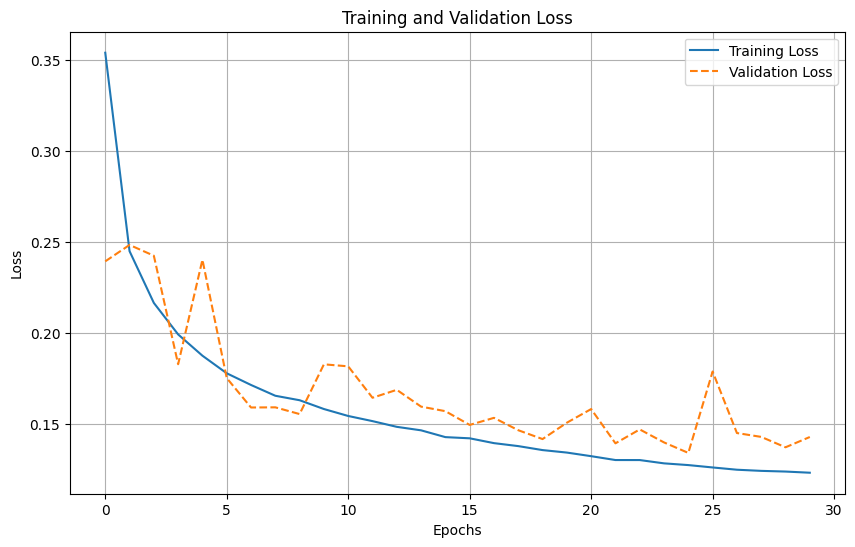

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

1879/1879 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


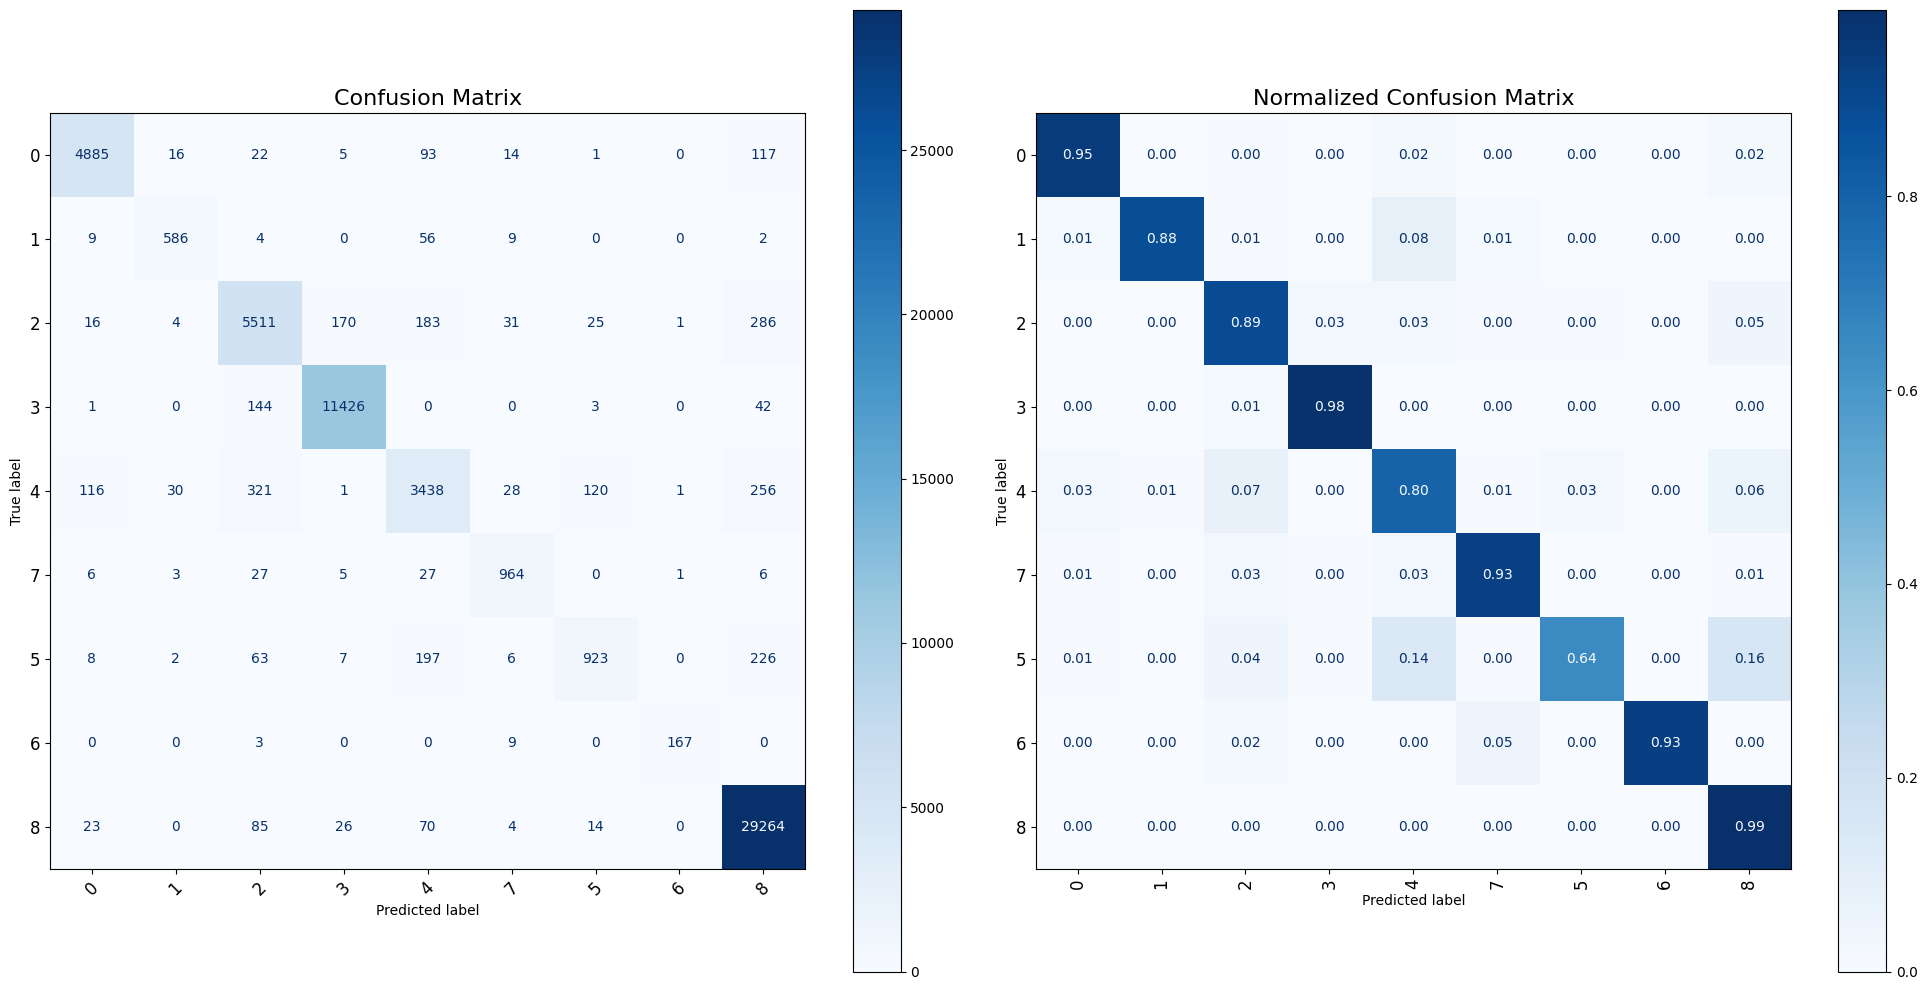

In [28]:
y_pred = np.argmax(model.predict(X_test_resized), axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

# Plot the standard confusion matrix on the first subplot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=failure_types)
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=axes[0])  # Plot on the first subplot (axes[0])
axes[0].set_title('Confusion Matrix', fontsize=16)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot the normalized confusion matrix on the second subplot
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=failure_types)
disp_normalized.plot(include_values=True, cmap=plt.cm.Blues, values_format='.2f', ax=axes[1], xticks_rotation='vertical')  # Plot on the second subplot (axes[1])
axes[1].set_title('Normalized Confusion Matrix', fontsize=16)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

In [29]:
# Initialize parameters
pr_table = pd.DataFrame(index=failure_types, columns=["Recall", "Precision", "F1"])

# Calculate Precision, Recall, and F1 score for each class
for idx in range(num_classes):
    # True Positives (TP), False Positives (FP), and False Negatives (FN)
    num_tp = cm[idx, idx]
    num_fp = sum(cm[:, idx]) - num_tp
    num_fn = sum(cm[idx, :]) - num_tp

    # Calculate precision and recall, handling division by zero
    precision = num_tp / (num_tp + num_fp) if (num_tp + num_fp) > 0 else 0.0
    recall = num_tp / (num_tp + num_fn) if (num_tp + num_fn) > 0 else 0.0

    # Calculate F1 score
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Store the values in the table
    pr_table.loc[failure_types[idx], "Recall"] = recall
    pr_table.loc[failure_types[idx], "Precision"] = precision
    pr_table.loc[failure_types[idx], "F1"] = f1_score

# Display the Precision-Recall table
print(pr_table)

     Recall Precision        F1
0  0.947991  0.964652  0.956249
1   0.87988  0.914197   0.89671
2  0.885017  0.891748  0.888369
3  0.983643  0.981615  0.982628
4  0.797495  0.845965  0.821015
7  0.927815  0.905164   0.91635
5  0.644553  0.849908  0.733122
6  0.932961  0.982353   0.95702
8  0.992471  0.969039  0.980615
